In [1]:
import pandas as pd
import plotly.express as px
!pip install missingno --quiet
!pip install wordcloud

In [2]:
from tqdm import tqdm
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

!pip install folium
import folium
from folium.plugins import FastMarkerCluster

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data = pd.read_csv('ages_dataset.csv')
data.head(3)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]


In [4]:
data.shape

(1223009, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 13 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   Id                                        1223009 non-null  object 
 1   Name                                      1223009 non-null  object 
 2   Short description                         1155109 non-null  object 
 3   Gender                                    1089363 non-null  object 
 4   Country                                   887500 non-null   object 
 5   Occupation                                1016095 non-null  object 
 6   Birth year                                1223009 non-null  int64  
 7   Death year                                1223008 non-null  float64
 8   Manner of death                           53603 non-null    object 
 9   Age of death                              1223008 non-null  float64
 10  Associ

In [6]:
data.describe()

,Birth year,Death year,Age of death
count,1.223009e+06,1.223008e+06,1.223008e+06
mean,1.844972e+03,1.914246e+03,6.927406e+01
std,1.479390e+02,1.516898e+02,1.662938e+01
min,-2.700000e+03,-2.659000e+03,0.000000e+00
25%,1.828000e+03,1.895000e+03,6.000000e+01
50%,1.887000e+03,1.955000e+03,7.200000e+01
75%,1.918000e+03,1.994000e+03,8.100000e+01
max,2.016000e+03,2.021000e+03,1.690000e+02


In [7]:
data = data.drop('Id', axis = 1)

In [8]:
data.head(3)

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]


#### A partir das informações acima, já podemos observar que em muitas colunas, os dados não foram totalmente preenchidos, veremos então como trabalhar com cada coluna da melhor forma possível

In [9]:
#verificando dados vazios
data.isnull().sum()

Name                                              0
Short description                             67900
Gender                                       133646
Country                                      335509
Occupation                                   206914
Birth year                                        0
Death year                                        1
Manner of death                             1169406
Age of death                                      1
Associated Countries                         368693
Associated Country Coordinates (Lat/Lon)     368693
Associated Country Life Expectancy           368930
dtype: int64

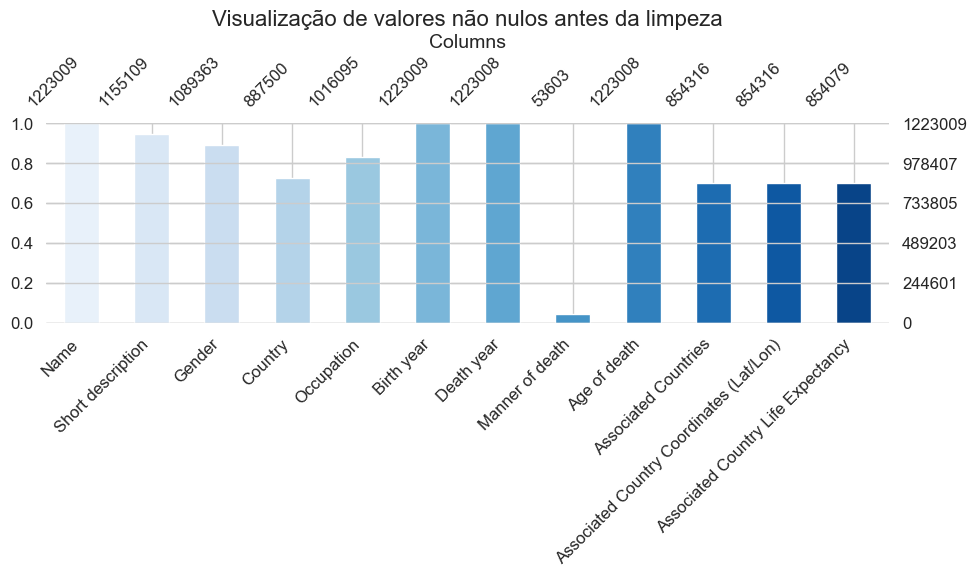

In [10]:
#visualizando valores nulos antes da limpeza
sns.set(style='whitegrid', font_scale = 1.2)
msno.bar(data, color = sns.color_palette('Blues', n_colors=len(data.columns)),figsize=(10,6),fontsize=12, labels=True)

plt.title('Visualização de valores não nulos antes da limpeza', fontsize=16)
plt.xlabel('Columns',fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [11]:
#retirando valores nulos das colunas 'Occupation','Associated Countries', 'Death Year'
data = data.dropna(subset=['Occupation','Associated Countries','Death year'],how = 'any')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782779 entries, 0 to 1223008
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Name                                      782779 non-null  object 
 1   Short description                         778748 non-null  object 
 2   Gender                                    713089 non-null  object 
 3   Country                                   782779 non-null  object 
 4   Occupation                                782779 non-null  object 
 5   Birth year                                782779 non-null  int64  
 6   Death year                                782779 non-null  float64
 7   Manner of death                           44874 non-null   object 
 8   Age of death                              782779 non-null  float64
 9   Associated Countries                      782779 non-null  object 
 10  Associated Country 

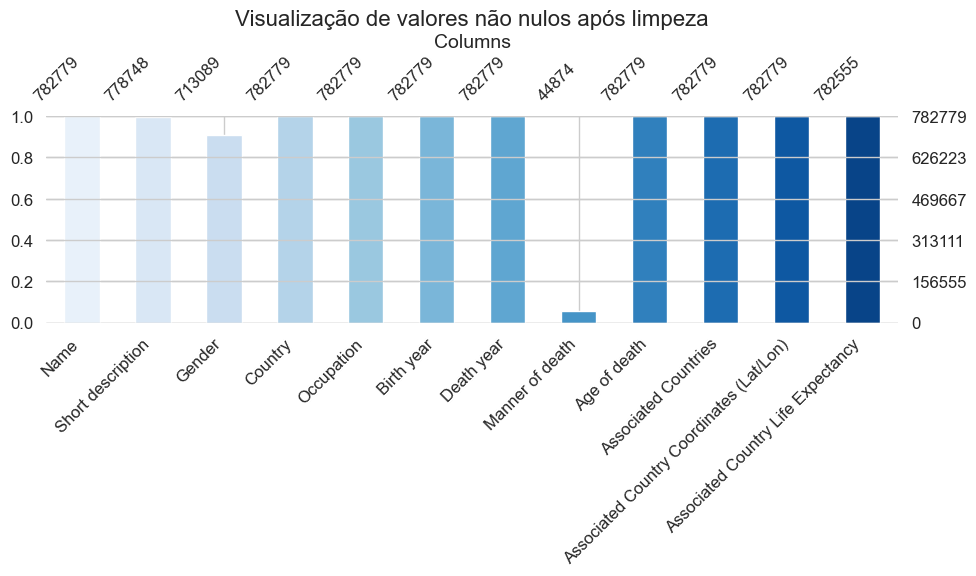

In [13]:
#visualizando valores nulos depois da limpeza
sns.set(style='whitegrid', font_scale = 1.2)
msno.bar(data, color = sns.color_palette('Blues', n_colors=len(data.columns)),figsize=(10,6),fontsize=12, labels=True)

plt.title('Visualização de valores não nulos após limpeza', fontsize=16)
plt.xlabel('Columns',fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [14]:
eda_data = data.copy()

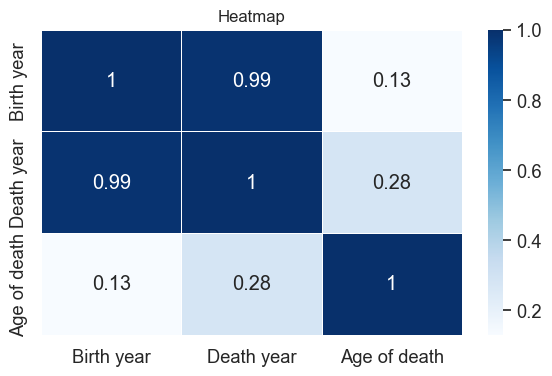

In [15]:
# criando heatmap de correlação
correlation_matrix = eda_data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues',linewidths=0.5)
plt.title('Heatmap',fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

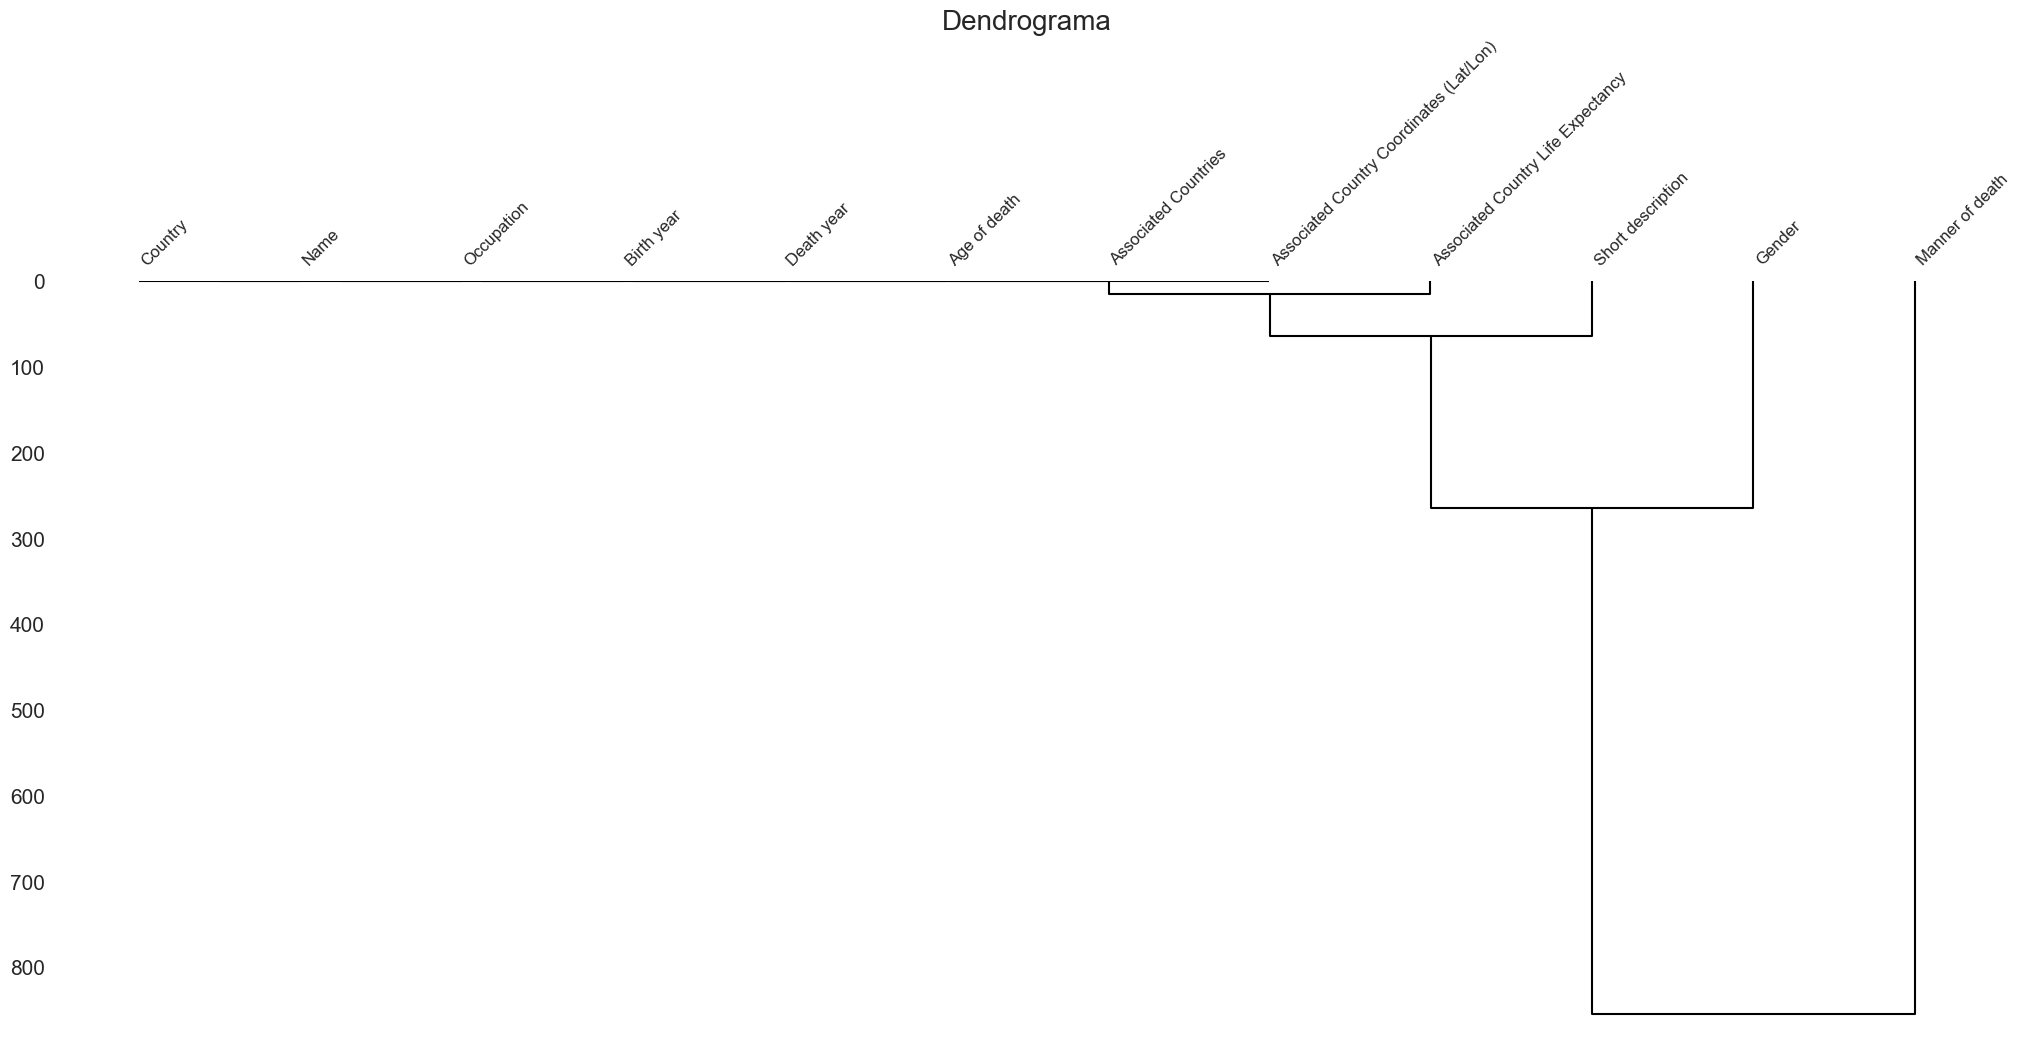

In [16]:
#dendrograma mostrando a correlação
plt.figure(figsize=(12,12))
msno.dendrogram(data,fontsize=12)
plt.title('Dendrograma', fontsize=20)

plt.show();

In [17]:
#vamos adicionar uma nova coluna com o número de pessoas associadas aos países
processed_data = data.copy()

In [18]:
processed_data['Number of Citizenships'] = processed_data['Country'].apply(lambda x: len(x.split(';')))

In [19]:
#definindo uma função para aplicar a média da expectativa de vida
def calculate_average(value):
    try:
        val = eval(value)
    except:
        return np.nan
    return np.mean(val)

In [20]:
processed_data['Life Expectancy'] = data['Associated Country Life Expectancy'].apply(calculate_average)

In [21]:
processed_data.head(5)

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy,Number of Citizenships,Life Expectancy
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]",2,79.90
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3],1,81.30
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5],1,78.50
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,['Austria'],"[(47.516231, 14.550072)]",[81.6],2,81.60
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]",2,82.25


In [22]:
#convertendo String para Array, já que quando carregamos o arquivo csv, os array são salvos como string
def convert_string_to_array(value):
    try:
        val = eval(value)
        return val
    except:
        return np.nan

In [23]:
processed_data['Associated Countries'] = processed_data['Associated Countries'].apply(convert_string_to_array)

In [24]:
processed_data['Associated Country Life Expectancy'] = processed_data['Associated Country Life Expectancy'].apply(convert_string_to_array)

In [25]:
processed_data['Associated Country Coordinates (Lat/Lon)'] = processed_data['Associated Country Coordinates (Lat/Lon)'].apply(convert_string_to_array)

In [26]:
processed_data.head(5)

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy,Number of Citizenships,Life Expectancy
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"[United Kingdom, United States]","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]",2,79.90
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,[United Kingdom],"[(55.378051, -3.435973)]",[81.3],1,81.30
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,[United States],"[(37.09024, -95.712891)]",[78.5],1,78.50
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,[Austria],"[(47.516231, 14.550072)]",[81.6],2,81.60
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"[Austria, Italy]","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]",2,82.25


In [27]:
#convertendo as colunas multi valores em array
def break_string_to_array(value):
    if type(value) == float:
        return np.nan
    elif ';' in value:
        arr = value.split(';')
    else:
        arr = [value]
        
    arr = [x.strip() for x in arr]
    return arr

In [28]:
processed_data['Occupation'] = processed_data['Occupation'].apply(break_string_to_array)

In [29]:
processed_data['Manner of death'] = processed_data['Manner of death'].apply(break_string_to_array)

In [30]:
def get_first_value_only(value):
    if type(value) == float:
        return np.nan
    
    if ";" in value:
        arr =value.split(";")
    else:
        arr = [value]
    
    arr = [x.strip() for x in arr]
    return arr[0]

In [31]:
processed_data["Gender"] = processed_data["Gender"].apply(get_first_value_only)

In [32]:
processed_data.head()

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy,Number of Citizenships,Life Expectancy
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,[Politician],1732,1799.0,[natural causes],67.0,"[United Kingdom, United States]","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]",2,79.90
1,Douglas Adams,English writer and humorist,Male,United Kingdom,[Artist],1952,2001.0,[natural causes],49.0,[United Kingdom],"[(55.378051, -3.435973)]",[81.3],1,81.30
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,[Politician],1809,1865.0,[homicide],56.0,[United States],"[(37.09024, -95.712891)]",[78.5],1,78.50
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,[Artist],1756,1791.0,NaN,35.0,[Austria],"[(47.516231, 14.550072)]",[81.6],2,81.60
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,[Artist],1770,1827.0,NaN,57.0,"[Austria, Italy]","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]",2,82.25


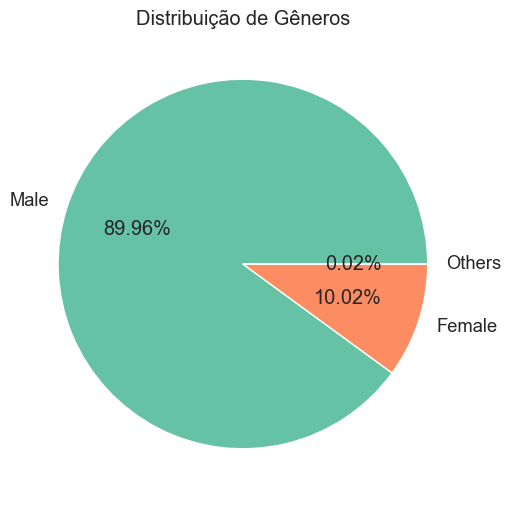

In [33]:
#cuidando da coluna gender
gender_count = processed_data['Gender'].value_counts()

#juntando outros em 'Other'
others_count = gender_count[~gender_count.index.isin(['Male','Female'])].sum()
gender_count = gender_count[gender_count.index.isin(['Male','Female'])]
gender_count['Others'] = others_count

#criando o gráfico

plt.figure(figsize=(6,6))
plt.pie(gender_count,labels=gender_count.index, autopct = '%1.2f%%', colors = sns.color_palette("Set2"))
plt.title('Distribuição de Gêneros')

plt.show()

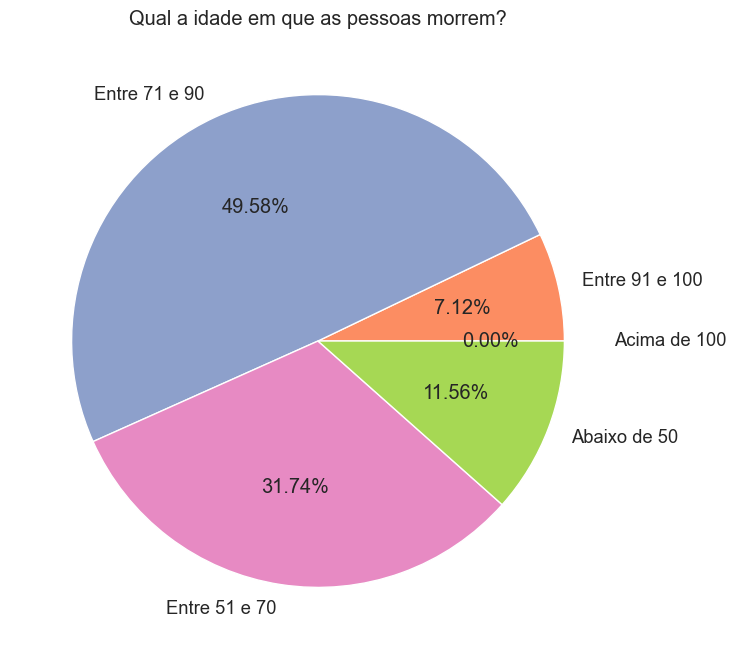

In [34]:
#visualizando as idades em que a morte ocorre com mais frequência
#calculando o número de pessoas em cada faixa etária
count = [processed_data[processed_data['Age of death'] > 100].shape[0],
        processed_data[(processed_data['Age of death'] <= 100) & (processed_data['Age of death'] > 90)].shape[0],
        processed_data[(processed_data['Age of death'] <=90) & (processed_data['Age of death'] > 70)].shape[0],
        processed_data[(processed_data['Age of death'] <= 70) & (processed_data['Age of death'] > 50)].shape[0],
        processed_data.shape[0] - (processed_data[processed_data['Age of death'] > 100].shape[0]
                                      +processed_data[(processed_data['Age of death'] <= 100) & (processed_data['Age of death'] > 90)].shape[0]
                                      +processed_data[(processed_data['Age of death'] <=70) & (processed_data['Age of death'] > 50)].shape[0]
                                      +processed_data[(processed_data['Age of death'] <= 90) & (data['Age of death'] >70)].shape[0])]
         
#definindo as faixas
age_ranges = ['Acima de 100', 'Entre 91 e 100', 'Entre 71 e 90','Entre 51 e 70','Abaixo de 50']

         
#definindo o 'explode' para dar foco a primeira fatia (age > 100)
explode = [0.1,0,0,0,0]
         
palette_color = sns.color_palette("Set2")
         
#criando o gráfico
plt.figure(figsize=(12,8))
plt.pie(count, labels=age_ranges, colors=palette_color, explode = explode, autopct='%.2f%%')
plt.title('Qual a idade em que as pessoas morrem?')
         
plt.show()

In [39]:
#convertendo os arrays na coluna  'Associated Countries' para linhas individuais
data_exploded = processed_data.explode('Associated Countries')

#criando a lista dos 10 países mais representados
top10_paises = data_exploded['Associated Countries'].value_counts().reset_index()
top10_paises

,index,Associated Countries
0,United States,152886
1,United Kingdom,93673
2,Germany,91712
3,France,75039
4,Italy,35543
...,...,...
186,Kiribati,6
187,Marshall Islands,6
188,Laos,5
189,Palestinian National Authority,5


In [41]:
top10_paises.columns = ['Country','Count']

In [42]:
top10_paises = top10_paises.head(10)

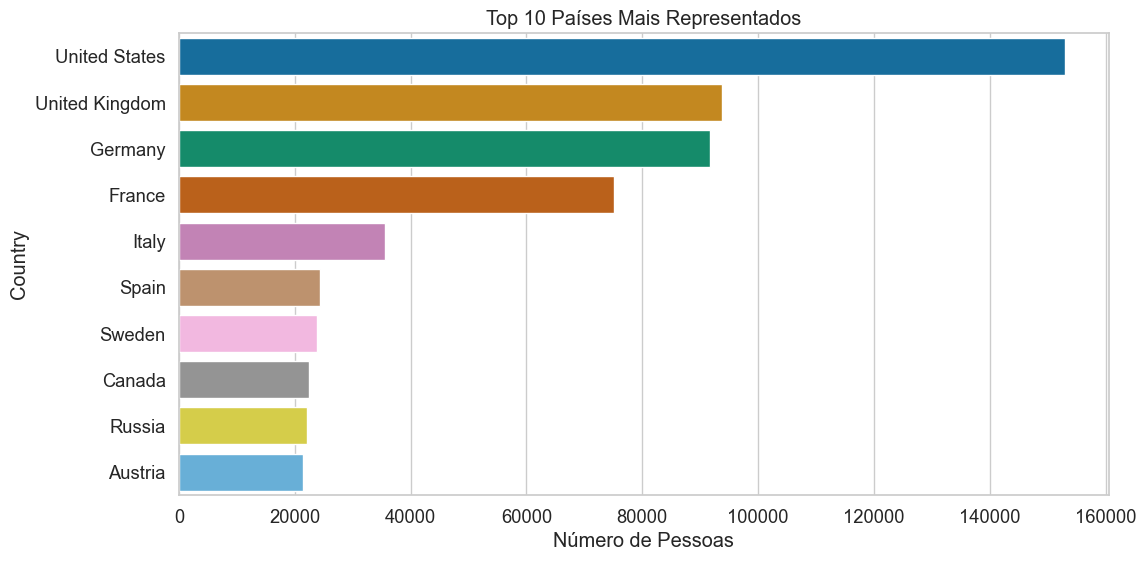

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_paises, x ='Count', y = 'Country', palette='colorblind')

plt.title('Top 10 Países Mais Representados')
plt.xlabel('Número de Pessoas')
plt.ylabel('Country')

plt.show()

In [46]:
#utilizando o 'explode' para a coluna 'Manner Of death'
exploded_data = processed_data.explode('Manner of death')

#selecionando os 10 maiores tipos de morte
top10_maneiras_morte = exploded_data['Manner of death'].value_counts().nlargest(10)
top10_maneiras_morte

natural causes           30460
suicide                   4616
accident                  4496
homicide                  3226
capital punishment        1661
unnatural death            265
death in battle            132
extrajudicial killing        9
ballistic trauma             8
euthanasia                   7
Name: Manner of death, dtype: int64

In [55]:
#criando o gráfico
fig = px.bar(x =top10_maneiras_morte.index, y = top10_maneiras_morte.values, 
             labels={'x':'Tipos de Morte', 'y' : 'Número de Mortes'}, 
                     title = 'Tipos de Mortes Mais Comuns')

fig.update_xaxes(tickangle = 45)

fig.show()


In [56]:
#utilizando o 'explode' para a coluna 'Occupation'
exploded_data = processed_data.explode('Occupation')

#selecionando os 10 maiores tipos de morte
top10_cargos = exploded_data['Occupation'].value_counts().nlargest(10)
top10_cargos

Artist                224560
Politician            162978
Athlete                94189
Researcher             68028
Military personnel     37839
Religious figure       19409
Architect              14144
Businessperson         13990
Journalist             12387
Teacher                12247
Name: Occupation, dtype: int64

In [57]:
#criando o gráfico
fig = px.bar(x =top10_cargos.index, y = top10_cargos.values, 
             labels={'x':'Cargos', 'y' : 'Número de Pessoas'}, 
                     title = 'Cargos Mais Comuns')

fig.update_xaxes(tickangle = 45)

fig.show()


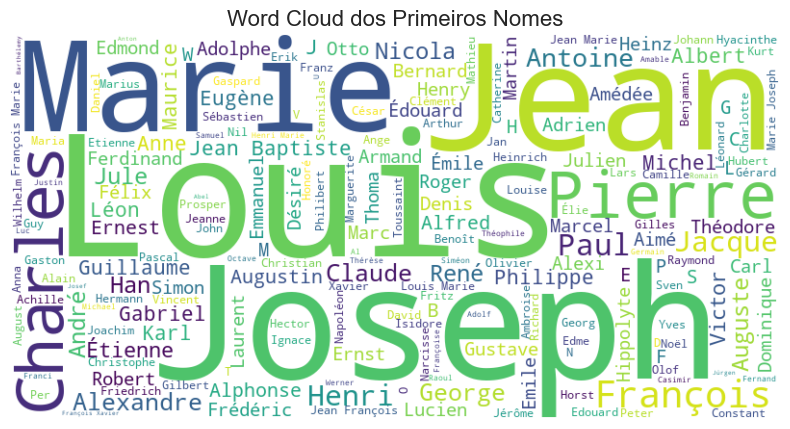

In [61]:
# Extraindo os primeiros nomes da coluna 'Name'
primeiro_nome_data = processed_data['Name'].str.split(expand=True)[0].str.strip().str.title()

# Criação de um set para não repetir os nomes
primeiro_nome_unico = set(primeiro_nome_data)

# juntando todo os primeiros nomes únicos em uma string
todos_primeiros_nomes = ' '.join(primeiro_nome_unico)

# criando a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(todos_primeiros_nomes)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dos Primeiros Nomes', fontsize=16)
plt.show()